# AVOCADO ANALYSIS FOR REGION AND AVERAGE PRICE IN US


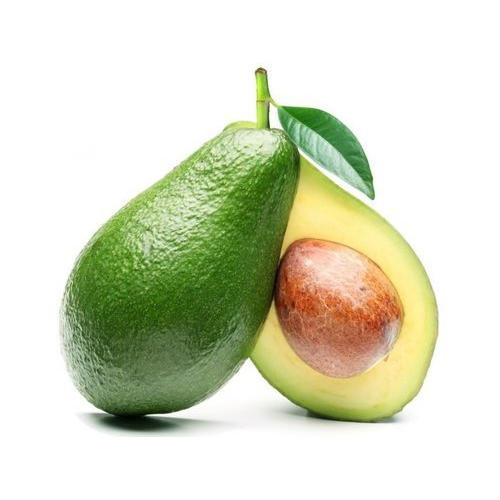

In [ ]:
#IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df=pd.read_csv('/Users/vikram/Downloads/avocado.csv')
df

In [ ]:
df.columns

In [ ]:

df.dtypes

In [ ]:
df.isnull().sum()

# EDA

In [ ]:
df['Others']=(df['Total Volume']-(df['4046']+df['4225']+df['4770']))


In [ ]:
df['Others']

**AS OTHER VARIETY MAY NOT INCLUDE DUPLIATE VALUES AS TOTAL VOLUME**

CAN DROP TOTAL VOLUME NOW

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(15,12))


sns.heatmap(df.describe(),annot=True,cmap='Blues',linewidths=.2,linecolor='black')

In [ ]:
np.unique(df['Unnamed: 0'])

In [ ]:
df['Unnamed: 0'].value_counts()

UNNAMED COLUMN IS JUST THE NO OF OBSERVATION FROM DIFFERENT REGION AND MIXED TOGETHER SO BETTER DROPPING IT

In [ ]:

df['Month']=pd.to_datetime(df.Date,format="%Y/%m/%d").dt.month

df.head()

In [ ]:
df.drop(['Date'],axis=1,inplace=True)
df.drop(['Total Volume'],axis=1,inplace=True)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

## DATA VISUALIZATION

In [ ]:
#AVERAGE PRCIE VS REGION
plt.figure(figsize=(20,30))
sns.boxplot(y = "region", x = "AveragePrice", data = df.sort_values("AveragePrice", ascending = False))
plt.show()


AS PER THE ASCENING ORDER WE CAN SEE SanFrancisco IN THE WEST IS HAVING THE HIGHEST PRICE ND LOWEST IS IN SOUTH CENTRAL WHICH MAY BE IN SOUTH EAST REGION AS ALL REGIONS NEAR BY NORTH -NORTHEAST  ARE HAVING AVERAGE PRICE LOW THAT OF WEST.
ALSO DEPENDS ON VARIOUS OTHER FACTORS WE WILL SEE FURTHER


In [ ]:
plt.figure(figsize=(20,15))


sns.stripplot(data=df,x='Others',y='region',jitter=True,
               dodge=True )

OTHER TYPE OF AVOCADOS SOLD IN PARTICULAR REGION IS SHOWN IN GRAPH

TOTALUS HAS THE HIGHEST SOLD AVOCADOS 


In [ ]:
plt.figure(figsize=(20,15))

sns.set_context('paper', font_scale=1.5)
sns.stripplot(data=df,x='4770',y='region',jitter=True,dodge=True )

SAME LIKE OTHERS TYPE 4770 IS ALSO HAVING SAME DEMAND IN DIFFERENT PARTS OF USA

In [ ]:
plt.figure(figsize=(20,15))
sns.set_context('paper', font_scale=1.5)
sns.scatterplot(data=df,x='Total Bags',y='region')

CALIFORNIA AND WEST REGION ARE HAVING GREATER NUMBER OF TOTAL BAGS SOLD AVOCADOS

FOLLOWED BY NORTH EAST AND NEY YORK

LEAST IS WITH ALBANY AND SYRACUSE

In [ ]:
plt.figure(figsize=(10,8))


sns.barplot(data=df,x='type',y='4225')

from above all graph we caan see organic type avocados are less in PLU 4225 , PLU4770 and in different regions 

In [ ]:
plt.figure(figsize=(10,8))


sns.barplot(data=df,x='Month',y='AveragePrice',hue='type')

**from july to november rates are high in a year**

ALSO RATES FOR ORGANIC IS ALWAYS HIGH THROUGHT THE YEAR FROM CONVENTIONAL

In [ ]:
plt.figure(figsize=(10,8))


sns.barplot(data=df,x='type',y='AveragePrice')

**average price for organic type avocados are high compared to conventional**


In [ ]:
plt.figure(figsize=(10,8))


sns.barplot(data=df,x='type',y='Others')

Other type of avocados are having high conventional type than organic

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(data=df,x='type',y='Small Bags')

organic type in small bags are also less compared to conventional

# Handling Categorical Data


 **Nominal data** -->  **OneHotEncoder** is used in this case

 **Ordinal data** -->  **LabelEncoder** is used in this case


In [ ]:
df['type'].value_counts()

In [ ]:
df['region'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['region'] = LE.fit_transform(df['region'])
df['type'] = LE.fit_transform(df['type'])

In [ ]:
df.value_counts('type')

#0= coventional
#1=organic

In [ ]:
df.value_counts('region')



In [ ]:
df.head()

# CORRELATION

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(15,12))


sns.heatmap(df.corr(),annot=True,cmap='Paired_r',linewidths=.2,linecolor='black')



1) TOTAL BAGS AND ITS DIVIDENTS AS SMALL AND LARGE BAGS ARE SIMILAR INPUTS CAN DROP TOTAL BAGS


2) YEAR DONT HAVE IMPACT ON ANY OF THEM,DROPPING IT TOO


In [ ]:
df.drop(['Total Bags'],inplace=True,axis=1)
df.drop(['year'],inplace=True,axis=1)
df.head()


In [ ]:
plt.figure(figsize=(22,7))
df.corr()['region'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### no negative correllation

# checking outliers

In [ ]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,15),color = 'green')
plt.tight_layout()

OUTLIERS ARE PRESENT SO REMOVING IT

# apply z score

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df_new=df[(z<3).all(axis=1)]
x=df_new
x

# seperating features and label

In [ ]:
#independent column
x=df_new.drop(['region'],axis=1)
#target
y=df_new['region']

In [ ]:
x.shape

In [ ]:
y.shape

# skewness check

In [ ]:
df_new.skew()

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=10:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

#### SKEWNESS IS PRESENT IN ALL BAGS AND VOLUME COLUMNS
 REMOVING IT 

In [ ]:
from sklearn.preprocessing import power_transform

In [ ]:
df_new=power_transform(x,method='yeo-johnson')
df_new

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

# Splitting the DataFrame
train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=142)



In [ ]:
x_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

# MODEL BUILDING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)
print(predlo)


print('Accuracy Score is',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

In [ ]:
#2 MODEL

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_dt))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_dt))
print('Classification Report''\n',classification_report(y_test,pred_dt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_rfc))
print('Classification Report''\n',classification_report(y_test,pred_rfc))

In [ ]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_svc))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_svc))
print('Classification Report''\n',classification_report(y_test,pred_svc))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier


ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))


In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
print('Accuracy score''\n',accuracy_score(predknn,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,predknn))
print('Classification Report''\n',classification_report(y_test,predknn))

### RandomForestClassifier AND ExtraaTreeClassifier has the best results

# Cross Validation
for checking the overfitting

In [ ]:
#LOGISTIC REGRESSION

test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# RANDOM FOREST CLASSIFIER

test_accuracy= accuracy_score(y_test,pred_rfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# SUPPORT VECTOR CLASSIFIER

test_accuracy= accuracy_score(y_test,pred_svc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
#KN CLASSIFIER

test_accuracy= accuracy_score(y_test,predknn)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# EXTRA TRESS CLASSIFIER


test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETC,x,y,cv=i,n_jobs=5)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

## RandomForestClassifier has the best cv score too and difference is also low
### so can be considered as best model,

**performing hyperparameter for the same**

# Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=8,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

In [ ]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
accuracy_score(y_test,gcv_pred)#checking the final score

print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))

**ACCURACY SCORE AFTER HYPERPARAMETER OF RANDOM FORES IS 90 AND CV SCORE IS 74.50**



#### RANDOM FOREST CLASSIFIER IS MY BEST MODEL FOR THIS DATASET AS IT HAS HIGH ACCURACY SCORE AND MODEL IS NOT UNDER OR OVER FITTED AS CV SCORE IS ALSO AROUND ACCURACY SCORE 

AND ALSO FALSE POSITIVE OR FALSE NEGATIVE IS ALSO VERY LOW AND RECALL ,PRECISION AND F1 SCORE ARE GOOD 

# Final Prediction Submission

In [ ]:
import numpy as np
a = np.array(y_test)
predicted = np.array(rfc.predict(x_test))
df_range = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df_range

# PRICE PREDICTION

# NOW THE SAME DATASET WE WILL BE USING FOR PRICE PRIDICTION

In [ ]:
df_price=pd.read_csv('/Users/vikram/Downloads/avocado.csv')
df_price


In [ ]:
df_price.columns

In [ ]:
df_price.info()

In [ ]:
df_price.isnull().sum()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_price.isnull())

# EDA

In [ ]:
np.unique(df_price['Unnamed: 0'])

In [ ]:
df_price['Unnamed: 0'].value_counts

NO VALUE REQUIRED OF UNNAMED COLUMN SO DROPING IT

CONVERTING DATE INTO MONTH ONLY

In [ ]:

df_price['Month']=pd.to_datetime(df_price.Date,format="%Y/%m/%d").dt.month

df_price.head()

In [ ]:
df_price.drop(['Date'],axis=1,inplace=True)
df_price.drop(['Unnamed: 0'],axis=1,inplace=True)
df_price.head()

In [ ]:
df_price['Others']=(df_price['Total Volume']-(df_price['4046']+df_price['4225']+df_price['4770']))
df_price['Others']


In [ ]:
#AVERAGE PRCIE VS REGION
plt.figure(figsize=(20,30))
sns.boxplot(y = "region", x = "AveragePrice", data = df_price.sort_values("AveragePrice", ascending = False))
plt.show()



AVERAGE PRICE FOR AVOCADOS ARE HIGH IN CALIFORNIA AND LEAST IN SOUTH CENTRAL

ALSO DEPENDS ON ORGANIC OR CONVENTIONAL TYPES

In [ ]:
plt.figure(figsize=(12,10))


sns.lineplot(data=df_price,x='AveragePrice',y='Others')

#### OTHERS TYPE OF AVOCADO GETS HIGH AT A PARTICULAR PRICE 

i.e. higher the rate lower gets the volume

**it lies between the range of 0.5 to 1.5 of average price**

**and we can see high demand volume at an average price of 1.0**

In [ ]:
plt.figure(figsize=(12,10))


sns.lineplot(data=df_price,x='AveragePrice',y='Total Bags',hue='type')

TOTAL BAGS  AND TOTAL VOLUME ARE ALMOST SAME IN REPRESENTING VALUES OVER GRAPH

HERE WE CAN SEE THE DIFFERENCE BETWEEN ORGANIC AND CONVENTIONAL TYPE AVOCADOS WITH RESPECT TO AVERAGE PRICE
 
ORGANIC TYPE DONT HAVE A SKEWNESS IN GRAPHICAL REPRESENTATION AS CONVENTIONAL DOES

HIGHER THE RATE LESS THE QUANTITY..

In [ ]:
plt.figure(figsize=(15,12))


sns.barplot(data=df_price,x='Month',y='AveragePrice',hue='type')

JULY TO NOVEMBER THE PRICE FOR ORGANIC TYPE IS HIGH AND IN DEMAND THROUGHOUT THE YEAR
 
CONVENTIONAL TYPE HAS DEMAND THROUGHOUT THE YEAR AND COMPARATIVELY LOW IN PRICE

# CORRELATION

In [ ]:
df_price.corr()

In [ ]:
plt.figure(figsize=(22,7))
df_price.corr()['AveragePrice'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

ALL EXCEPT MONTH AND YEAR ARE NEGATIVELY CORRELATED TO AVERAGE PRICE

AS PRICE INCREASES VOLUME DECREASES

In [ ]:
plt.figure(figsize=(15,12))


sns.heatmap(df_price.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,linecolor='black')

TOTAL BAGS AND TOTAL VOLUME ARE MUCH CORRELATED TO THIER DIVIDENTS SO DROPPING IT FOR AVOIDING DUPLICATE VALUES



In [ ]:
df_price.drop(['Total Bags'],axis=1,inplace=True)
df_price.drop(['Total Volume'],axis=1,inplace=True)

df_price.head()

In [ ]:
df_price.head()

# Handling Categorical Data

### Nominal data --> OneHotEncoder is used in this case

### Ordinal data --> LabelEncoder is used in this case

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_price['region'] = LE.fit_transform(df_price['region'])
df_price['type'] = LE.fit_transform(df_price['type'])


In [ ]:
df_price['type'].value_counts()

#0 -- conventional
#1 -- organic

In [ ]:
df_price['region'].value_counts()



In [ ]:
df_price.head()

# CHECKING OUTLIERS

In [ ]:
sns.set(style="darkgrid")
df_price.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,15),color = 'green')
plt.tight_layout()

# REMOVING OUTLIERS 

### BY ZSCORE

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(df_price))
z


In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
df1_price=df_price[(z<3).all(axis=1)]
df1_price.head()


In [ ]:
df1_price.shape

# percentage loss

In [ ]:
loss_percent=(18249-17651)/17651*100
print(loss_percent,'%')

# SELECTING FEATURE AND LABEL

In [ ]:
#independent column
x=df1_price.drop(['AveragePrice'],axis=1)
#target
y=df1_price['AveragePrice']

In [ ]:
x.shape

In [ ]:
y.shape

# CHECKING SKEWNESS

In [ ]:
df1_price.skew()

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df_price.columns:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df1_price[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

RIGHT SKEWNESS PRESENT IN ALL BAGS AND PLU's

HAD TO REMOVE THEM

In [ ]:
from sklearn.preprocessing import power_transform

df1_price['4046']=power_transform(df1_price,method='yeo-johnson')
df1_price['4225']=power_transform(df1_price,method='yeo-johnson')
df1_price['4770']=power_transform(df1_price,method='yeo-johnson')
df1_price['Others']=power_transform(df1_price,method='yeo-johnson')
df1_price['Small Bags']=power_transform(df1_price,method='yeo-johnson')
df1_price['Large Bags']=power_transform(df1_price,method='yeo-johnson')
df1_price['XLarge Bags']=power_transform(df1_price,method='yeo-johnson')

df1_price.head()


# Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(df1_price)
X

# Splitting the DataFrame
**TRAIN_TEST_SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=140)



In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

# Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)


print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))


# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

In [ ]:

from sklearn.tree import DecisionTreeRegressor

dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
dtc_pred=dtc.predict(x_test)


print('score : ',dtc.score(x_train,y_train))
print('r2 score : ',r2_score(y_test,dtc_pred))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,dtc_pred))
print('Mean squared error:', mean_squared_error(y_test,dtc_pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,dtc_pred)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Score: ',rf.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrf))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predrf))
print('Mean squared error:', mean_squared_error(y_test,predrf))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrf)))

In [ ]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

In [ ]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor


knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
print('Score: ',knn.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predknn))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,predknn))
print('Mean squared error:', mean_squared_error(y_test,predknn))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predknn)))

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor


ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR=ETR.predict(x_test)
print('Score: ',ETR.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred_ETR))

# printing errors

print('Mean absolute error:', mean_absolute_error(y_test,pred_ETR))
print('Mean squared error:', mean_squared_error(y_test,pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_ETR)))

**ExtraTreesRegressor AND RandomForestRegressor ARE SHOWING GOOD RESULTS**


# HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

parrf={'criterion' : ['mse', 'mae'], 'max_features':['auto','sqrt','log2']}
gcvrf= GridSearchCV(rf,parrf) 
gcvrf.fit(x_train,y_train)
gcvrf.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV

parETR={ 'max_features':['auto','sqrt','log2'], "max_leaf_nodes": [2, 5, 10]}
gcvETR= GridSearchCV(ETR,parETR) 
gcvETR.fit(x_train,y_train)
gcvETR.best_params_

# Now using the above parameters which are found to be best

In [ ]:
mod= ExtraTreesRegressor(max_leaf_nodes = 10, max_features='auto', random_state=140)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print('Score: ',mod.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred))

In [ ]:
mod1= RandomForestRegressor(criterion='mae', max_features='sqrt', random_state=140)
mod1.fit(x_train,y_train)
pred1=mod1.predict(x_test)
print('Score: ',mod1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,pred1))

# Cross Validation

In [ ]:
# LINEAR REGRESSION


test_accuracy= r2_score(y_test,predlr)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# DESICION TREE

test_accuracy= r2_score(y_test,dtc_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dtc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# RANDOM FOREST REGRESSOR
test_accuracy= r2_score(y_test,predrf)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rf,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")
    

In [ ]:
# SUPPORT VECTOR REGRESSOR
test_accuracy= r2_score(y_test,preds)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svr,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
#KNeighborsREGRESSOR
test_accuracy= r2_score(y_test,predknn)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

In [ ]:
# EXTRA TRESS REGRESSOR

test_accuracy= r2_score(y_test,pred_ETR)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETR,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

FROM THE ABOVE MODEL EXTRATREES REGRESSOR IS DOING BEST JOB.

ALSO ITS DIFFERENCE BETWEEN R2 SCORE AND CV SCORE IS LESS AND BEST FITS MODEL

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test, y= pred_ETR, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual Average Price', fontsize= 14 )
plt.ylabel('Predicted Average Price', fontsize= 18)
plt.show()


# FINAL SUBMISSION

In [ ]:
import numpy as np
a = np.array(y_test)
predicted = np.array(ETR.predict(x_test))
df_P = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df_P

# Saving the model

In [ ]:
import pickle
filename='Avocado.pkl'
pickle.dump(ETR,open(filename,'wb'))